In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import linalg as la
import keras
from keras.datasets import mnist
import tensorflow as tf
from keras import models,layers
from keras.layers import Input, Dense, Layer
from keras import backend as K
from keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import tensorflow.keras.datasets as tfds

Using TensorFlow backend.


## read data

In [2]:
rawdata = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
rawdata

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [4]:
todrop=['gameId','redFirstBlood','redKills','redDeaths','blueTotalGold','redTotalGold','blueTotalExperience','redTotalExperience']
data = rawdata.drop(labels=todrop,axis=1)

In [5]:
train_rate = 0.8

trainidx = np.random.rand(data.shape[0]) < train_rate

train = data[trainidx]
test = data[~trainidx]

In [6]:
train_data = np.array(train.drop('blueWins',axis=1))
train_label = np.array(train['blueWins'])

test_data = np.array(test.drop('blueWins',axis=1))
test_label = np.array(test['blueWins'])

In [7]:
normilizer = np.max(train_data,axis=0)

train_data=train_data/normilizer
test_data=test_data/normilizer

In [8]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [9]:
input_dim=train_data.shape[1]

In [10]:
Maxepoch = 100

## Model

### model1

In [11]:
ReluModel1 = models.Sequential(name='ReluModel1')

ReluModel1.add(layers.InputLayer(input_shape=(input_dim,)))
ReluModel1.add(layers.Dense(64,activation='relu'))
ReluModel1.add(layers.Dense(64,activation='relu'))
ReluModel1.add(layers.Dense(64,activation='relu'))
ReluModel1.add(layers.Dense(64,activation='relu'))
ReluModel1.add(layers.Dense(2,activation='softmax'))

ReluModel1.summary()    

Model: "ReluModel1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2048      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 14,658
Trainable params: 14,658
Non-trainable params: 0
_________________________________________________________________


In [12]:
ReluModel1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history1 = ReluModel1.fit(train_data, train_label, epochs=Maxepoch, verbose=1, validation_data=(test_data,test_label))

Train on 7927 samples, validate on 1952 samples
Epoch 1/100
7927/7927 [==============================] - 2s 238us/step - loss: 0.5569 - accuracy: 0.7111 - val_loss: 0.5411 - val_accuracy: 0.7285
Epoch 2/100
7927/7927 [==============================] - 1s 160us/step - loss: 0.5327 - accuracy: 0.7286 - val_loss: 0.5362 - val_accuracy: 0.7218
Epoch 3/100
7927/7927 [==============================] - 1s 170us/step - loss: 0.5323 - accuracy: 0.7268 - val_loss: 0.5347 - val_accuracy: 0.7280
Epoch 4/100
7927/7927 [==============================] - 1s 180us/step - loss: 0.5317 - accuracy: 0.7290 - val_loss: 0.5370 - val_accuracy: 0.7264
Epoch 5/100
7927/7927 [==============================] - 1s 170us/step - loss: 0.5292 - accuracy: 0.7293 - val_loss: 0.5350 - val_accuracy: 0.7269
Epoch 6/100
7927/7927 [==============================] - 1s 170us/step - loss: 0.5285 - accuracy: 0.7299 - val_loss: 0.5372 - val_accuracy: 0.7275
Epoch 7/100
7927/7927 [==============================] - 1s 177us/step

### model2

In [14]:
ReluModel2 = models.Sequential(name='ReluModel2')

ReluModel2.add(layers.InputLayer(input_shape=(input_dim,)))
ReluModel2.add(layers.Dense(128,activation='relu'))
ReluModel2.add(layers.Dense(128,activation='relu'))
ReluModel2.add(layers.Dense(128,activation='relu'))
ReluModel2.add(layers.Dense(128,activation='relu'))
ReluModel2.add(layers.Dense(2,activation='softmax'))

ReluModel2.summary()    

Model: "ReluModel2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               4096      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 258       
Total params: 53,890
Trainable params: 53,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
ReluModel2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history2 = ReluModel2.fit(train_data, train_label, epochs=Maxepoch, verbose=1, validation_data=(test_data,test_label))

Train on 7927 samples, validate on 1952 samples
Epoch 1/100
7927/7927 [==============================] - 1s 158us/step - loss: 0.5453 - accuracy: 0.7228 - val_loss: 0.5439 - val_accuracy: 0.7213
Epoch 2/100
7927/7927 [==============================] - 1s 147us/step - loss: 0.5345 - accuracy: 0.7302 - val_loss: 0.5369 - val_accuracy: 0.7300
Epoch 3/100
7927/7927 [==============================] - 1s 140us/step - loss: 0.5289 - accuracy: 0.7298 - val_loss: 0.5439 - val_accuracy: 0.7244
Epoch 4/100
7927/7927 [==============================] - 1s 151us/step - loss: 0.5300 - accuracy: 0.7292 - val_loss: 0.5397 - val_accuracy: 0.7213
Epoch 5/100
7927/7927 [==============================] - 1s 165us/step - loss: 0.5298 - accuracy: 0.7314 - val_loss: 0.5364 - val_accuracy: 0.7280
Epoch 6/100
7927/7927 [==============================] - 1s 146us/step - loss: 0.5276 - accuracy: 0.7332 - val_loss: 0.5509 - val_accuracy: 0.7259
Epoch 7/100
7927/7927 [==============================] - 1s 154us/step

### model3

In [17]:
ReluModel3 = models.Sequential(name='ReluModel3')

ReluModel3.add(layers.InputLayer(input_shape=(input_dim,)))
ReluModel3.add(layers.Dense(64,activation='relu'))
ReluModel3.add(layers.Dense(64,activation='relu'))
ReluModel3.add(layers.Dense(64,activation='relu'))
ReluModel3.add(layers.Dense(64,activation='relu'))
ReluModel3.add(layers.Dense(32,activation='relu'))
ReluModel3.add(layers.Dense(32,activation='relu'))
ReluModel3.add(layers.Dense(32,activation='relu'))
ReluModel3.add(layers.Dense(32,activation='relu'))
ReluModel3.add(layers.Dense(2,activation='softmax'))

ReluModel3.summary()    

Model: "ReluModel3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                2048      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1

In [18]:
ReluModel3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history3 = ReluModel3.fit(train_data, train_label, epochs=Maxepoch, verbose=1, validation_data=(test_data,test_label))

Train on 7927 samples, validate on 1952 samples
Epoch 1/100
7927/7927 [==============================] - 2s 291us/step - loss: 0.5655 - accuracy: 0.6923 - val_loss: 0.5521 - val_accuracy: 0.7249
Epoch 2/100
7927/7927 [==============================] - 2s 260us/step - loss: 0.5341 - accuracy: 0.7278 - val_loss: 0.5534 - val_accuracy: 0.7198
Epoch 3/100
7927/7927 [==============================] - 2s 264us/step - loss: 0.5341 - accuracy: 0.7314 - val_loss: 0.5399 - val_accuracy: 0.7259
Epoch 4/100
7927/7927 [==============================] - 2s 265us/step - loss: 0.5307 - accuracy: 0.7323 - val_loss: 0.5374 - val_accuracy: 0.7223
Epoch 5/100
7927/7927 [==============================] - 2s 276us/step - loss: 0.5300 - accuracy: 0.7318 - val_loss: 0.5376 - val_accuracy: 0.7244
Epoch 6/100
7927/7927 [==============================] - 2s 260us/step - loss: 0.5280 - accuracy: 0.7323 - val_loss: 0.5375 - val_accuracy: 0.7244
Epoch 7/100
7927/7927 [==============================] - 2s 272us/step

### model4

In [20]:
ReluModel4 = models.Sequential(name='ReluModel4')

ReluModel4.add(layers.InputLayer(input_shape=(input_dim,)))
ReluModel4.add(layers.Dense(64,activation='relu'))
ReluModel4.add(layers.BatchNormalization())
ReluModel4.add(layers.Dense(64,activation='relu'))
ReluModel4.add(layers.BatchNormalization())
ReluModel4.add(layers.Dense(64,activation='relu'))
ReluModel4.add(layers.BatchNormalization())
ReluModel4.add(layers.Dense(64,activation='relu'))
ReluModel4.add(layers.BatchNormalization())
ReluModel4.add(layers.Dense(2,activation='softmax'))

ReluModel4.summary()    

Model: "ReluModel4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                2048      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4

In [21]:
ReluModel4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history4 = ReluModel4.fit(train_data, train_label, epochs=Maxepoch, verbose=1, validation_data=(test_data,test_label))

Train on 7927 samples, validate on 1952 samples
Epoch 1/100
7927/7927 [==============================] - 3s 409us/step - loss: 0.6131 - accuracy: 0.6871 - val_loss: 0.5916 - val_accuracy: 0.6926
Epoch 2/100
7927/7927 [==============================] - 3s 342us/step - loss: 0.5570 - accuracy: 0.7119 - val_loss: 0.5550 - val_accuracy: 0.7147
Epoch 3/100
7927/7927 [==============================] - 3s 336us/step - loss: 0.5570 - accuracy: 0.7155 - val_loss: 0.5535 - val_accuracy: 0.7136
Epoch 4/100
7927/7927 [==============================] - 3s 336us/step - loss: 0.5447 - accuracy: 0.7216 - val_loss: 0.5480 - val_accuracy: 0.7162
Epoch 5/100
7927/7927 [==============================] - 3s 352us/step - loss: 0.5393 - accuracy: 0.7230 - val_loss: 0.5629 - val_accuracy: 0.7193
Epoch 6/100
7927/7927 [==============================] - 3s 322us/step - loss: 0.5401 - accuracy: 0.7263 - val_loss: 0.5456 - val_accuracy: 0.7228
Epoch 7/100
7927/7927 [==============================] - 3s 345us/step

### model5

In [23]:
SgModel1 = models.Sequential(name='SgModel1')

SgModel1.add(layers.InputLayer(input_shape=(input_dim,)))
SgModel1.add(layers.Dense(64,activation='sigmoid'))
SgModel1.add(layers.Dense(64,activation='sigmoid'))
SgModel1.add(layers.Dense(64,activation='sigmoid'))
SgModel1.add(layers.Dense(64,activation='sigmoid'))
SgModel1.add(layers.Dense(2,activation='softmax'))

SgModel1.summary()    

Model: "SgModel1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                2048      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 130       
Total params: 14,658
Trainable params: 14,658
Non-trainable params: 0
_________________________________________________________________


In [24]:
SgModel1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history5 = SgModel1.fit(train_data, train_label, epochs=Maxepoch, verbose=1, validation_data=(test_data,test_label))

Train on 7927 samples, validate on 1952 samples
Epoch 1/100
7927/7927 [==============================] - 1s 189us/step - loss: 0.6652 - accuracy: 0.5752 - val_loss: 0.5615 - val_accuracy: 0.7065
Epoch 2/100
7927/7927 [==============================] - 2s 198us/step - loss: 0.5445 - accuracy: 0.7251 - val_loss: 0.5414 - val_accuracy: 0.7182
Epoch 3/100
7927/7927 [==============================] - 1s 187us/step - loss: 0.5358 - accuracy: 0.7278 - val_loss: 0.5400 - val_accuracy: 0.7239
Epoch 4/100
7927/7927 [==============================] - 1s 186us/step - loss: 0.5378 - accuracy: 0.7260 - val_loss: 0.5473 - val_accuracy: 0.7213
Epoch 5/100
7927/7927 [==============================] - 2s 190us/step - loss: 0.5334 - accuracy: 0.7342 - val_loss: 0.5391 - val_accuracy: 0.7244
Epoch 6/100
7927/7927 [==============================] - 1s 184us/step - loss: 0.5349 - accuracy: 0.7341 - val_loss: 0.5412 - val_accuracy: 0.7254
Epoch 7/100
7927/7927 [==============================] - 2s 197us/step

### model6

In [26]:
SgModel2 = models.Sequential(name='SgModel2')

SgModel2.add(layers.InputLayer(input_shape=(input_dim,)))
SgModel2.add(layers.Dense(128,activation='sigmoid'))
SgModel2.add(layers.Dense(128,activation='sigmoid'))
SgModel2.add(layers.Dense(128,activation='sigmoid'))
SgModel2.add(layers.Dense(128,activation='sigmoid'))
SgModel2.add(layers.Dense(2,activation='softmax'))

SgModel2.summary()    

Model: "SgModel2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               4096      
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 258       
Total params: 53,890
Trainable params: 53,890
Non-trainable params: 0
_________________________________________________________________


In [27]:
SgModel2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history6 = SgModel2.fit(train_data, train_label, epochs=Maxepoch, verbose=1, validation_data=(test_data,test_label))

Train on 7927 samples, validate on 1952 samples
Epoch 1/100
7927/7927 [==============================] - 2s 212us/step - loss: 0.6299 - accuracy: 0.6203 - val_loss: 0.5468 - val_accuracy: 0.7121
Epoch 2/100
7927/7927 [==============================] - 1s 183us/step - loss: 0.5445 - accuracy: 0.7237 - val_loss: 0.5391 - val_accuracy: 0.7208
Epoch 3/100
7927/7927 [==============================] - 1s 182us/step - loss: 0.5382 - accuracy: 0.7252 - val_loss: 0.5475 - val_accuracy: 0.7218
Epoch 4/100
7927/7927 [==============================] - 2s 192us/step - loss: 0.5371 - accuracy: 0.7268 - val_loss: 0.5389 - val_accuracy: 0.7223
Epoch 5/100
7927/7927 [==============================] - 1s 177us/step - loss: 0.5366 - accuracy: 0.7303 - val_loss: 0.5715 - val_accuracy: 0.7131
Epoch 6/100
7927/7927 [==============================] - 1s 179us/step - loss: 0.5338 - accuracy: 0.7274 - val_loss: 0.5446 - val_accuracy: 0.7213
Epoch 7/100
7927/7927 [==============================] - 1s 166us/step

### model7

In [29]:
SgModel3 = models.Sequential(name='SgModel3')

SgModel3.add(layers.InputLayer(input_shape=(input_dim,)))
SgModel3.add(layers.Dense(64,activation='sigmoid'))
SgModel3.add(layers.Dense(64,activation='sigmoid'))
SgModel3.add(layers.Dense(64,activation='sigmoid'))
SgModel3.add(layers.Dense(64,activation='sigmoid'))
SgModel3.add(layers.Dense(32,activation='sigmoid'))
SgModel3.add(layers.Dense(32,activation='sigmoid'))
SgModel3.add(layers.Dense(32,activation='sigmoid'))
SgModel3.add(layers.Dense(32,activation='sigmoid'))
SgModel3.add(layers.Dense(2,activation='softmax'))

SgModel3.summary()    

Model: "SgModel3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                2048      
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_41 (Dense)             (None, 32)                105

In [30]:
SgModel3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
history7 = SgModel3.fit(train_data, train_label, epochs=Maxepoch, verbose=1, validation_data=(test_data,test_label))

Train on 7927 samples, validate on 1952 samples
Epoch 1/100
7927/7927 [==============================] - 2s 293us/step - loss: 0.6977 - accuracy: 0.4965 - val_loss: 0.6935 - val_accuracy: 0.5077
Epoch 2/100
7927/7927 [==============================] - 2s 255us/step - loss: 0.6703 - accuracy: 0.5784 - val_loss: 0.5925 - val_accuracy: 0.7065
Epoch 3/100
7927/7927 [==============================] - 2s 274us/step - loss: 0.5764 - accuracy: 0.7215 - val_loss: 0.5698 - val_accuracy: 0.7188
Epoch 4/100
7927/7927 [==============================] - 2s 268us/step - loss: 0.5543 - accuracy: 0.7275 - val_loss: 0.5610 - val_accuracy: 0.7198
Epoch 5/100
7927/7927 [==============================] - 2s 278us/step - loss: 0.5440 - accuracy: 0.7310 - val_loss: 0.5539 - val_accuracy: 0.7223
Epoch 6/100
7927/7927 [==============================] - 2s 276us/step - loss: 0.5383 - accuracy: 0.7312 - val_loss: 0.5431 - val_accuracy: 0.7249
Epoch 7/100
7927/7927 [==============================] - 2s 259us/step

### model8

In [32]:
SgModel4 = models.Sequential(name='SgModel4')

SgModel4.add(layers.InputLayer(input_shape=(input_dim,)))
SgModel4.add(layers.Dense(64,activation='sigmoid'))
SgModel4.add(layers.BatchNormalization())
SgModel4.add(layers.Dense(64,activation='sigmoid'))
SgModel4.add(layers.BatchNormalization())
SgModel4.add(layers.Dense(64,activation='sigmoid'))
SgModel4.add(layers.BatchNormalization())
SgModel4.add(layers.Dense(64,activation='sigmoid'))
SgModel4.add(layers.BatchNormalization())
SgModel4.add(layers.Dense(2,activation='softmax'))

SgModel4.summary()    

Model: "SgModel4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 64)                2048      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dense_47 (Dense)             (None, 64)                416

In [33]:
SgModel4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history8 = SgModel4.fit(train_data, train_label, epochs=Maxepoch, verbose=1, validation_data=(test_data,test_label))

Train on 7927 samples, validate on 1952 samples
Epoch 1/100
7927/7927 [==============================] - 3s 396us/step - loss: 0.5805 - accuracy: 0.7059 - val_loss: 0.6732 - val_accuracy: 0.7049
Epoch 2/100
7927/7927 [==============================] - 3s 340us/step - loss: 0.5513 - accuracy: 0.7153 - val_loss: 0.5654 - val_accuracy: 0.7193
Epoch 3/100
7927/7927 [==============================] - 3s 346us/step - loss: 0.5445 - accuracy: 0.7231 - val_loss: 0.5646 - val_accuracy: 0.7029
Epoch 4/100
7927/7927 [==============================] - 3s 376us/step - loss: 0.5434 - accuracy: 0.7231 - val_loss: 0.5547 - val_accuracy: 0.7131
Epoch 5/100
7927/7927 [==============================] - 3s 321us/step - loss: 0.5446 - accuracy: 0.7192 - val_loss: 0.5467 - val_accuracy: 0.7285
Epoch 6/100
7927/7927 [==============================] - 3s 335us/step - loss: 0.5436 - accuracy: 0.7227 - val_loss: 0.5597 - val_accuracy: 0.7100
Epoch 7/100
7927/7927 [==============================] - 3s 356us/step

## Summary

In [35]:
histories=[history1,history2,history3,history4,history5,history6,history7,history8]
Mnames=[ReluModel1.name,ReluModel2.name,ReluModel3.name,ReluModel4.name,
       SgModel1.name,SgModel2.name,SgModel3.name,SgModel4.name]

nModel = 8

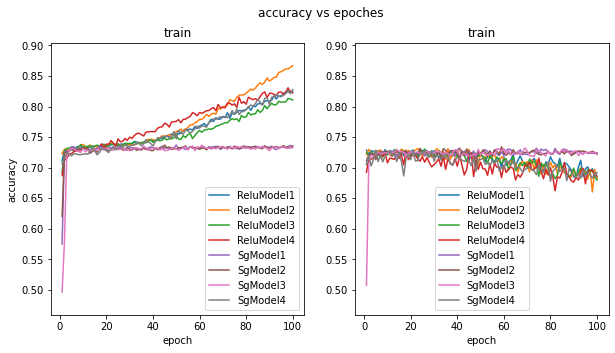

In [36]:
epoches=list(range(1,Maxepoch+1))

allacc = np.r_[np.r_[tuple([histories[i].history['accuracy'] for i in range(nModel)])],
         np.r_[tuple([histories[i].history['val_accuracy'] for i in range(nModel)])]]

ymin = np.min(allacc)
ymax = np.max(allacc)

ymin,ymax = -(ymax-ymin)/10+ymin,(ymax-ymin)/10+ymax

plt.figure(figsize=(10,5))
plt.suptitle('accuracy vs epoches')

ax = plt.subplot(1, 2, 1)

for i in range(nModel):
    plt.plot(epoches,histories[i].history['accuracy'],label=Mnames[i])

plt.ylim(ymin,ymax)
plt.title('train')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('accuracy')

ax = plt.subplot(1, 2, 2)

for i in range(nModel):
    plt.plot(epoches,histories[i].history['val_accuracy'],label=Mnames[i])

plt.ylim(ymin,ymax)
plt.title('test')
plt.legend(loc='best')
plt.xlabel('epoch')

plt.savefig('accuracy.png')
pass

In [38]:
tuple([(np.mean(histories[i].history['val_accuracy'][10:20]),np.std(histories[i].history['val_accuracy'][10:20])) for i in range(nModel)])

((0.7248463094234466, 0.003951314200695363),
 (0.7246413946151733, 0.004812570778791916),
 (0.7243852555751801, 0.0030992734866312527),
 (0.7167008221149445, 0.006061563026425753),
 (0.7246926248073577, 0.002480268569071051),
 (0.7243340134620666, 0.0022147439575250093),
 (0.7247438609600068, 0.002602644072871928),
 (0.7149590194225312, 0.010973647915812273))

In [39]:
tuple([np.max(histories[i].history['val_accuracy']) for i in range(nModel)])

(0.7300204634666443,
 0.7320696711540222,
 0.7305327653884888,
 0.7284836173057556,
 0.7320696711540222,
 0.7341188788414001,
 0.7320696711540222,
 0.7284836173057556)